In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

df=pd.read_pickle('rterg_summary.pkl')

# fixes now implemented in main code
df=df.rename(columns={"Lat.":"Lat", "Long.":"Long","Ehf/Tr^3":"Ehf_Tr3"})
#df["Eventname"] = str(int(df["Eventname"])).zfill(8)   # convert to string with leading zeros
df["iMag"]=pd.to_numeric(df["iMag"], errors='coerce', downcast='float')   # to float (was str)
df

,Eventname,oTime,Lat,Long,Depth,Me,Txo,Ehf,Ebb,Mehf,Ehf_Tr3,Nstats,iMagType,SRC,iMag,TACER_HF,TACER_BB,Comment,mTime,iteration
0,00010500,2000-01-05 07:40:40+00:00,-11.27,165.25,15,6.28,83,1.3e+13,5.9e+13,6.31,2.3e+07,19,M_,__,6.0,NaN,NaN,Solomon Islands : IRIS Fetched Data,2016-12-06 22:55:40+00:00,A
1,00010800,2000-01-08 01:19:46+00:00,-9.78,159.99,15,6.32,78,1.5e+13,6.8e+13,6.34,3.1e+07,24,M_,__,6.4,NaN,NaN,Solomon Islands : IRIS Fetched Data,2016-12-06 23:28:08+00:00,A
2,00030693,1993-03-06 03:05:48+00:00,-10.73,164.02,15,0,538,0,-inf,1,0,0,M_,__,7.1,NaN,NaN,Solomon Islands : IRIS Fetched Data | 1993,2016-12-07 00:13:59+00:00,A
3,00051699,1999-05-16 00:51:20+00:00,-4.99,152.76,42,6.93,90,1.9e+14,5.6e+14,7.08,2.6e+08,27,M_,__,7.0,NaN,NaN,Solomon Islands : IRIS Fetched Data | 1999,2016-12-08 17:45:51+00:00,A
4,00081695,1995-08-16 10:27:26+00:00,-5.51,153.64,45.6,0,392,0,-inf,4,0,0,M_,__,7.7,NaN,NaN,Solomon Islands : IRIS Fetched Data | 1995,2016-12-08 18:21:34+00:00,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,21030701,2021-03-07 04:53:59+00:00,-37.18,179.63,10,5.68,68,3.7e+12,7.6e+12,5.94,1.2e+07,39,M,US,5.5,37,37,NaN,2021-03-07 05:23:04+00:00,6
5012,21030702,2021-03-07 19:28:47+00:00,-28.54,-177.01,10,5.54,84,2.1e+12,4.6e+12,5.78,3.5e+06,37,M,US,5.5,27,31,NaN,2021-03-07 20:00:42+00:00,6
5013,21030703,2021-03-07 23:56:56+00:00,-29.6,-177.03,10,5.88,65,8.6e+12,1.5e+13,6.19,3.2e+07,46,M,US,5.6,34.5,34,NaN,2021-03-08 00:33:27+00:00,6
5014,21030800,2021-03-08 12:56:34+00:00,-4.43,100.98,10,5.28,85,1e+12,1.9e+12,5.56,1.6e+06,48,M,US,5.5,38.5,64,NaN,2021-03-08 13:27:39+00:00,6


# Resize so plots are larger

In [32]:
import matplotlib 
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
matplotlib.rcParams['figure.figsize'] = [20,10]

## Me vs Mehf

In [80]:
# Added comparison to iMag, and to display Event name
fig = px.scatter(df, x='Me',y='Mehf',color='iMag', range_x=[3.8,9.5],range_y=[3.8,9.5],hover_data=['Eventname'])
fig.show()

In [81]:
# Adding Line
fig = go.Figure()
Me = np.array(df.Me)
Mehf = np.array(df.Mehf)
Event_name = np.array(df.Eventname)
fig.add_trace(go.Scatter(x=Me,y=Mehf,mode='markers',text=Event_name))
fig.add_trace(go.Scatter(x=[1,10],y=[1, 10],mode='lines', name='unity line'))
fig.update_layout(xaxis_range=[3.5,9],yaxis_range=[3.5,9])
fig.show()

## Me vs Mi
new vs. initial report

In [82]:
# need to convert iMag to float
fig = px.scatter(df, x='Me',y='iMag', range_x=[3.8,9.5],range_y=[3.8,9.5],hover_data=['Eventname'])
fig.show()

In [83]:
fig = go.Figure()
Me = np.array(df.Me)
iMag = np.array(df.iMag)
Event_name = np.array(df.Eventname)
fig.add_trace(go.Scatter(x=Me,y=iMag,mode='markers',text=Event_name))
fig.add_trace(go.Scatter(x=[1,10],y=[1, 10],mode='lines', name='unity line'))
fig.update_layout(xaxis_range=[3.5,9],yaxis_range=[3.5,9])
fig.show()

## Tr vs TACER

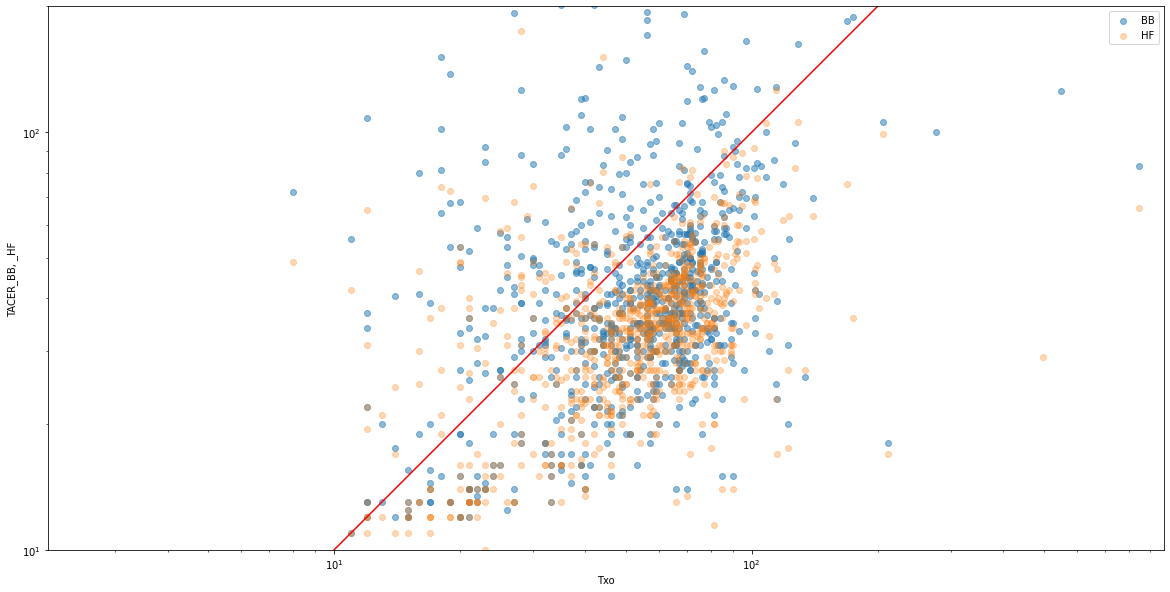

<Figure size 4000x4000 with 0 Axes>

In [85]:
# need to convert iMag to float
xmax=200
xmin=10
unity=np.linspace(xmin,xmax)

plt.scatter(df['Txo'],df['TACER_BB'],alpha=0.5, label="BB")
plt.scatter(df['Txo'],df['TACER_HF'],alpha=0.3, label="HF")


#plt.set_aspect('equal', adjustable='box') # create square 
plt.yscale('log')
plt.xscale('log')
plt.axis('equal')
plt.xlim([xmin, xmax])
plt.ylim([xmin, xmax])
plt.xlabel('Txo')
plt.ylabel('TACER_BB, _HF')
plt.legend()
plt.plot(unity,unity,'r-')

plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')

plt.show()

## TACER HF vs BB

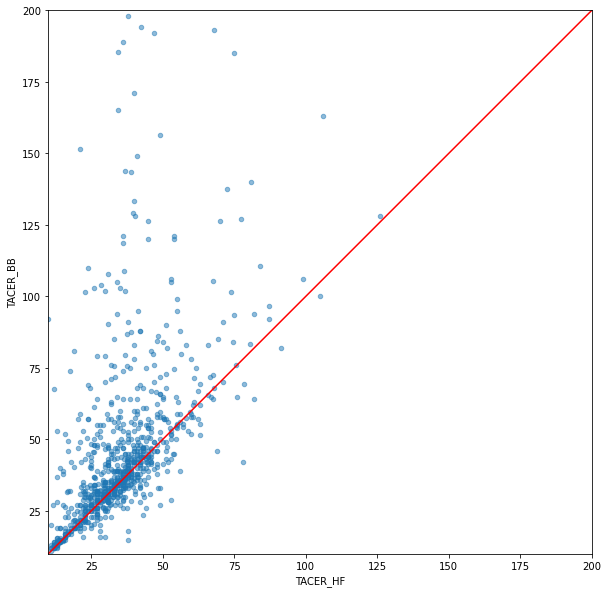

<Figure size 4000x4000 with 0 Axes>

In [84]:
# need to convert iMag to float
xmax=200
xmin=10
unity=np.linspace(xmin,xmax)

ax = df.plot.scatter(x='TACER_HF',y='TACER_BB',alpha=0.5,xlim=[xmin,xmax],ylim=[xmin,xmax])
ax.set_aspect('equal', adjustable='box') # create square 
plt.plot(unity,unity,'r-')
plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')
plt.show()

## Geographic plot of data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


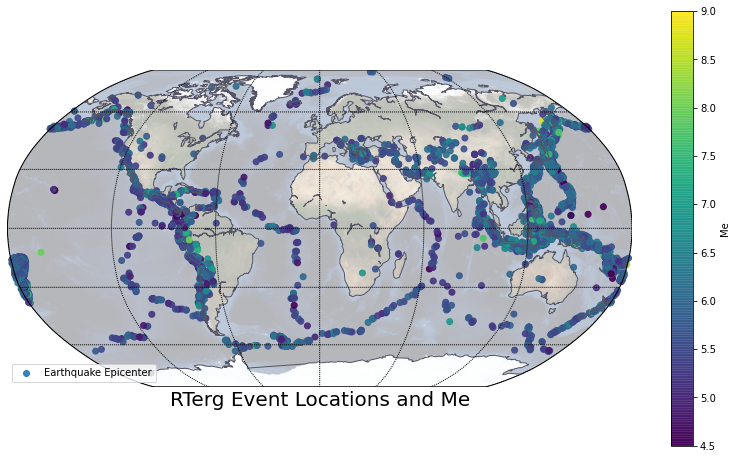

In [101]:
from mpl_toolkits.basemap import Basemap
import scipy.stats as stats
cm = plt.cm.get_cmap('viridis')
plt.figure(figsize=(14, 8))
earth = Basemap(projection='robin',lon_0=0)
earth.drawparallels(np.arange(-90.,120.,30.))
earth.drawmeridians(np.arange(0.,360.,60.))
earth.bluemarble(alpha=0.29)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y = earth(np.array(df.Long),np.array(df.Lat))
Me = np.array(df.Me)
sc = plt.scatter(x,y,c=Me,cmap=cm,alpha=.9,vmin=4.5, vmax=9,label='Earthquake Epicenter')
plt.colorbar(sc,label="Me")
plt.legend(loc='lower left')
plt.xlabel("RTerg Event Locations and Me", fontsize=20)
plt.show();

In [120]:
#Group_by_station = df.groupby(['sta','sta_lat','sta_lon']).size().reset_index(name='phase_count')

fig = px.scatter_geo(df,lat='Lat',lon='Long',projection="natural earth",color='iMag')
fig.update_layout(title='RTerg Event Locations and iMag')
fig.show()